In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy import sparse

%matplotlib inline

# Лабораторная работа 3 #

## Методы решения нелинейных уравнений и СНАУ ##

### Решаемое нелинейное уравнение ###
**е)** $x^2 - 20\sin{x} = 0$

**k)** $ln(x) + (x - 1)^3 = 0$
### Решаемая система нелинейных уравнений ###
**12.4 б)** $\begin{align}
    \begin{cases}
        \tan{(xy + 0.4)} = x^2 \\
        0.6 x^2 + 2y^2 = 1 \\
    \end{cases}
\end{align}$
**12.6 б)** $\begin{align}
    \begin{cases}
        (x - 1.4)^2 - (y - 0.6)^2 = 1 \\
        4.2x^2 + 8.8y^2 = 1.42 \\
    \end{cases}
\end{align}$



## Решение нелинейного уравнения ##


In [3]:
def F(x):
    return x**2 - 20 * np.sin(x)

class Bisection_Method_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, a_0, b_0):
        a = a_0
        b = b_0
        fa = self.f(a)
        fb = self.f(b)

        if fa * fb > 0:
            raise ValueError("На отрезке [{}, {}] нет смены знака функции".format(a_0, b_0))

        for i in range(self.n):
            c = 0.5 * (a + b)
            fc = self.f(c)

            # Выбираем подотрезок, где есть смена знака
            if fa * fc <= 0:
                b = c
                fb = fc
            else:
                a = c
                fa = fc

        # В качестве приближения корня возьмём середину текущего отрезка
        return 0.5 * (a + b)

[2.5, 3] => root (after 20 iterations): 2.752946615219116


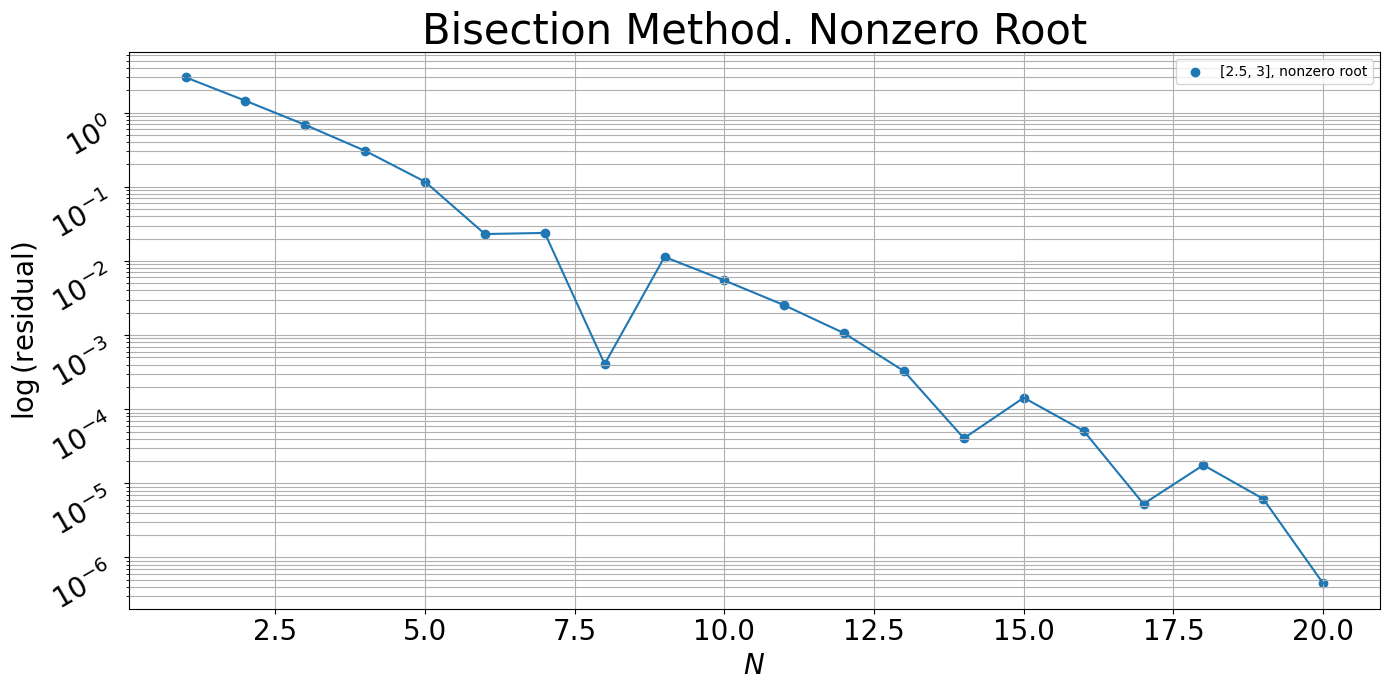

In [4]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Bisection Method. Nonzero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(F, i)
    root = bisection(2.5, 3.0)   # на отрезке [2.5, 3] есть ненулевой корень
    residuals.append(np.abs(F(root)))

plt.scatter(iterations, residuals, label="[2.5, 3], nonzero root")
plt.plot(iterations, residuals)
plt.legend(loc="best")
plt.tight_layout()

print(f"[2.5, 3] => root (after {iterations.size} iterations): {root}")

[-1, 1] => root (after 20 iterations): -9.5367431640625e-07


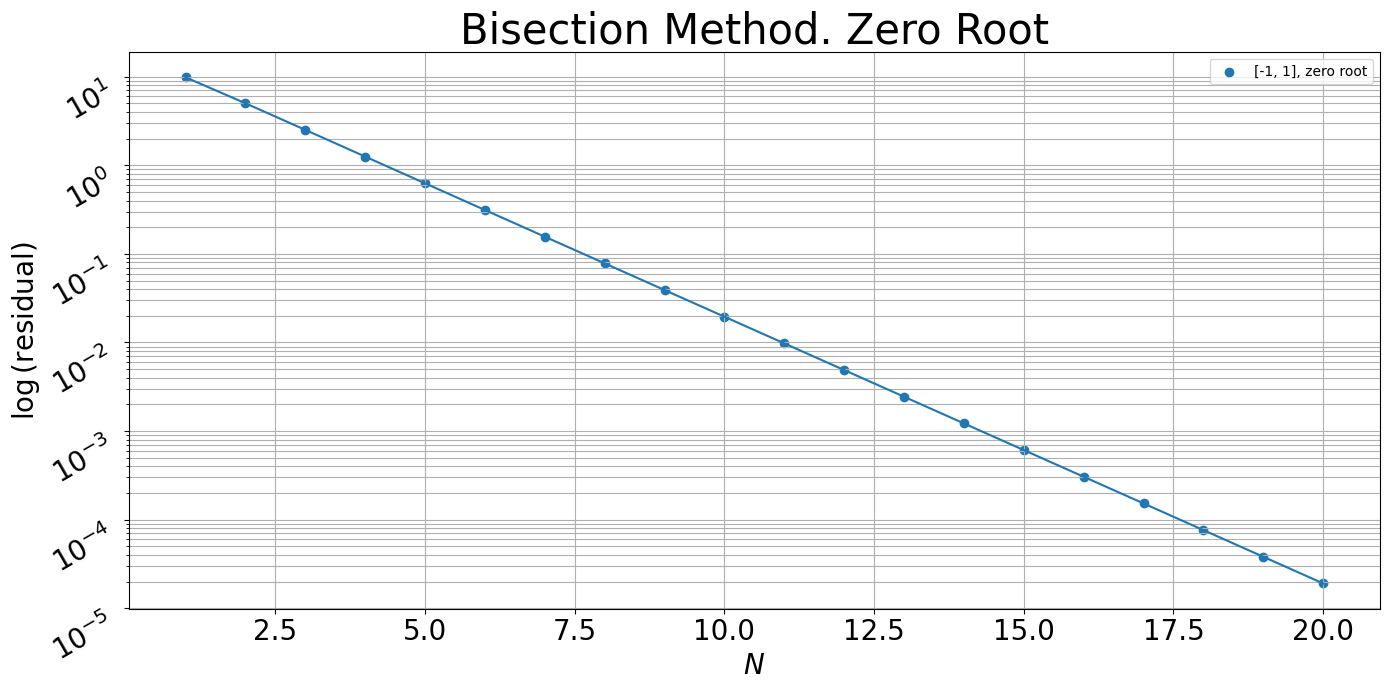

In [5]:
residuals.clear()

iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Bisection Method. Zero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(F, i)
    # На отрезке [-1, 1] функция меняет знак, и корень тут как раз x = 0
    root = bisection(-1.0, 1.0)
    residuals.append(np.abs(F(root)))

plt.scatter(iterations, residuals, label="[-1, 1], zero root")
plt.plot(iterations, residuals)
plt.legend(loc="best")
plt.tight_layout()

print(f"[-1, 1] => root (after {iterations.size} iterations): {root}")

### Метод простой итерации ###

Из уравнения следует, что $|x| \leq 2\sqrt{5} \approx 4.47$. При этом $20\sin{\left(-\frac{3\pi}{2}\right)} < 22.2 < \left(\frac{3\pi}{2}\right)^2$ $\Rightarrow$ $|x| \geq 0$.

Заметим, что $x = 0$ – корень уравнения. Второй корень лежит в диапазоне $x \in [2.5, 3]$. Зная это, построим МПИ.

$ x^2 - 20\sin{x} = 0 \Leftrightarrow x_{n+1} = f(x_n) = \pi - \arcsin{\frac{x_n^2}{20}}$

$|f'(x_n)| = \frac{2x}{\sqrt{400 - x^4}} \in [0.25, 0.31]$, $x \in [2.5, 3]$. Значит, МПИ сходится.

In [6]:
def f(x):
    return np.pi - np.arcsin(x**2 / 20)

class Fixed_Point_Iteration_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, x_0):
        x = x_0
        for i in range(self.n):
            x = self.f(x)

        return x

def f1(x):
    return np.arcsin(x**2 / 20)

x_0 = 2.7 => root: 2.7529466338171606
x_0 = 3 => root: 2.7529466338263275


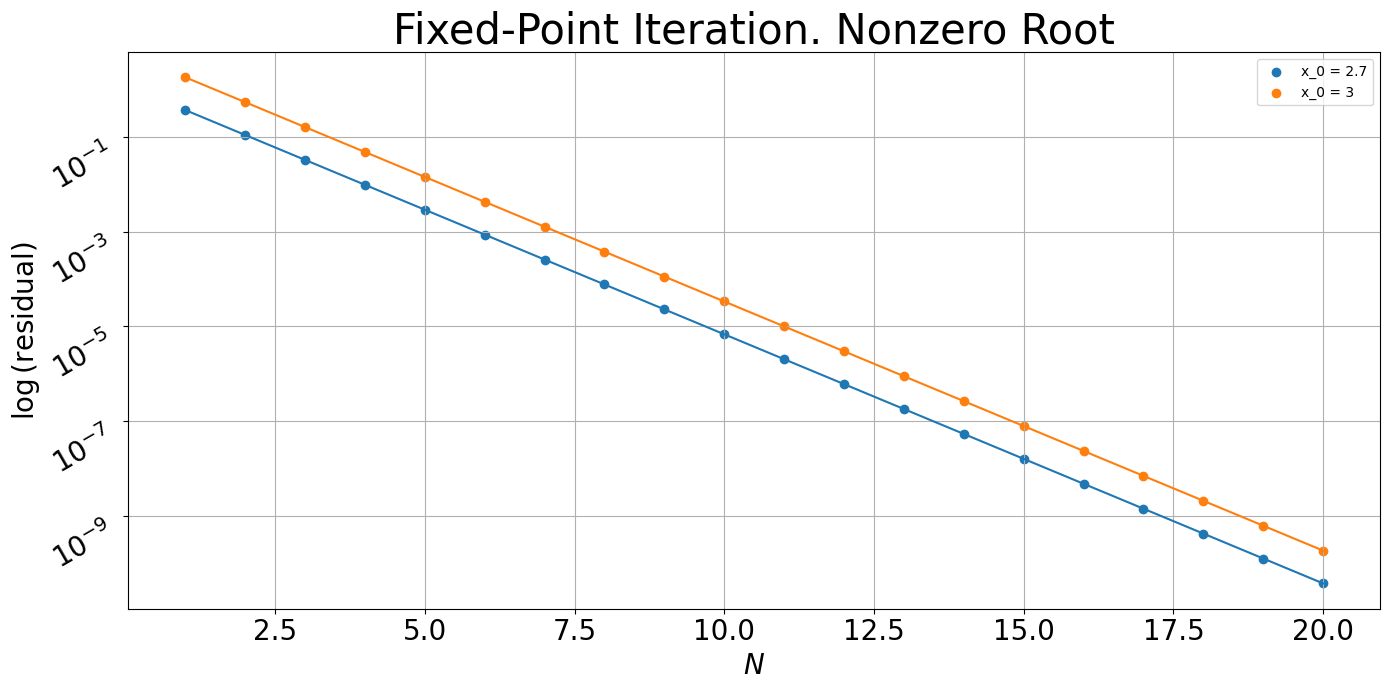

In [7]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Nonzero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f, i)
    root = fpie(2.7)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 2.7")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

print(f"x_0 = 2.7 => root: {root}")

residuals.clear()

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f, i)
    root = fpie(3)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 3")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 3 => root: {root}")

Аналогично, применим МПИ $x_{n+1} = f(x_n) = \arcsin{\frac{x_n^2}{20}}$ для отыскания корня $x = 0$.

$|f'(x_n)| = \frac{2x}{\sqrt{400 - x^4}} \in [0, 0.051]$, $x \in [-0.5, 0.5]$. Значит, МПИ сходится.

x_0 = 0.5 => root: 1.0846540435014123e-50
x_0 = 0.1 => root: 4.656615977487321e-73


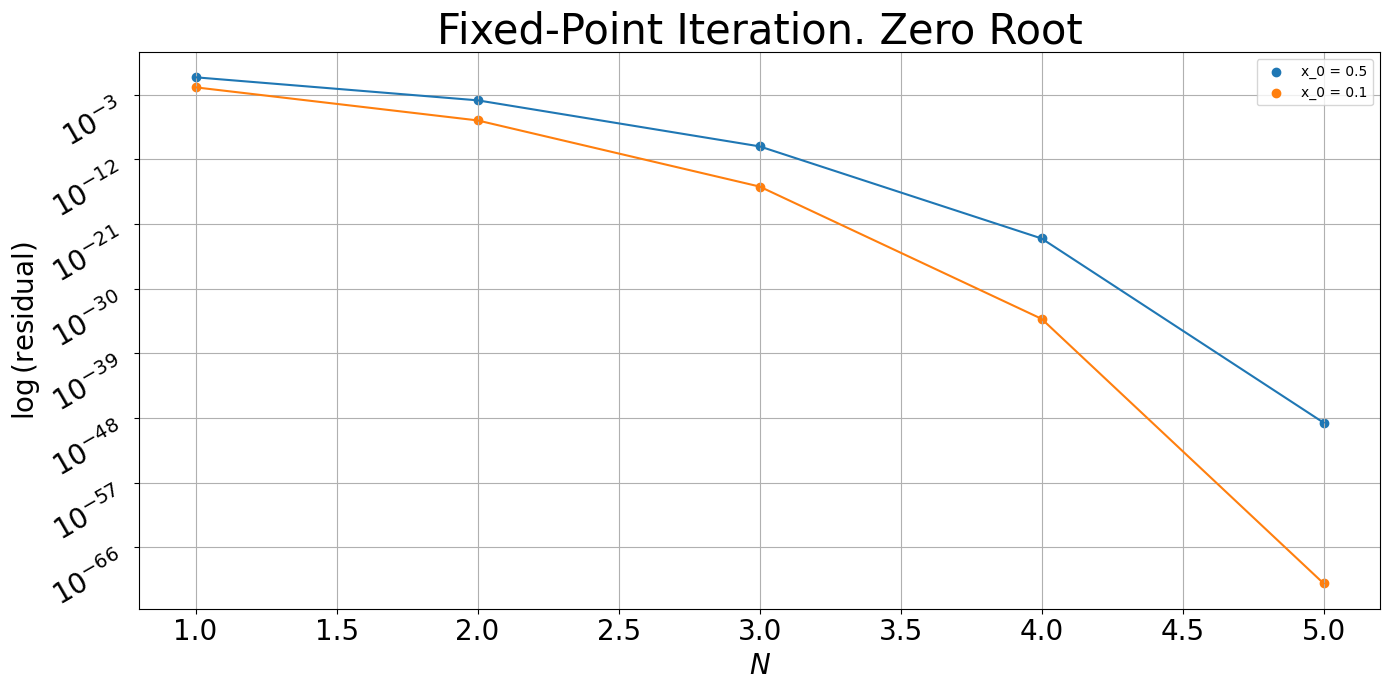

In [8]:
residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Zero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f1, i)
    root = fpie(0.5)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.5")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.5 => root: {root}")

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f1, i)
    root = fpie(0.1)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.1")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.1 => root: {root}")

### Метод Ньютона ###

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

In [9]:
def num_deriv(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def g(x):
    return x**2 - 20 * np.sin(x)

class Newton_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, x_0):
        x = x_0
        for i in range(self.n):
            x = x - (self.f(x) / num_deriv(self.f, x, 1e-3))

        return x

x_0 = 3 => root: 2.7529466338187047
x_0 = 2.8 => root: 2.7529466338187047


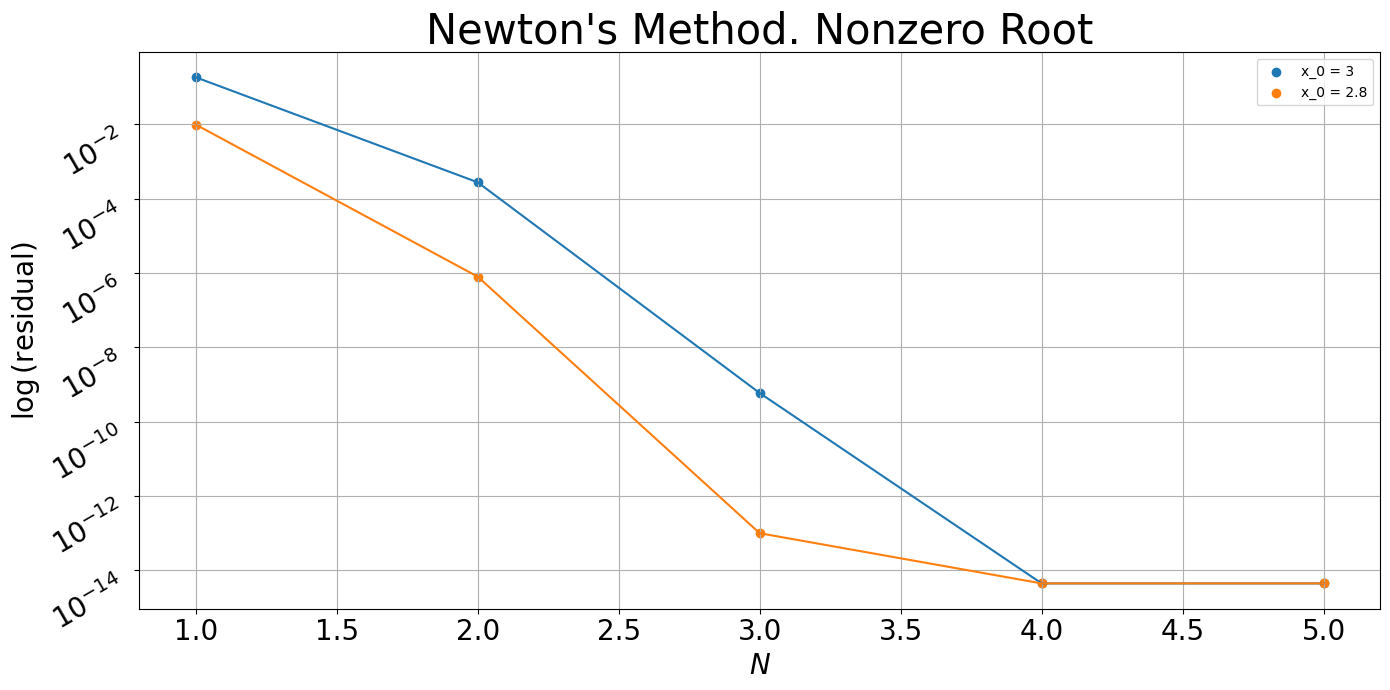

In [10]:
residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Nonzero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(3)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 3")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 3 => root: {root}")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(2.8)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 2.8")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 2.8 => root: {root}")

Аналогично, применим метод Ньютона для отыскания корня $x = 0$.

x_0 = 0.5 => root: -1.8581101203682818e-23
x_0 = 0.1 => root: 1.6221542085612976e-28


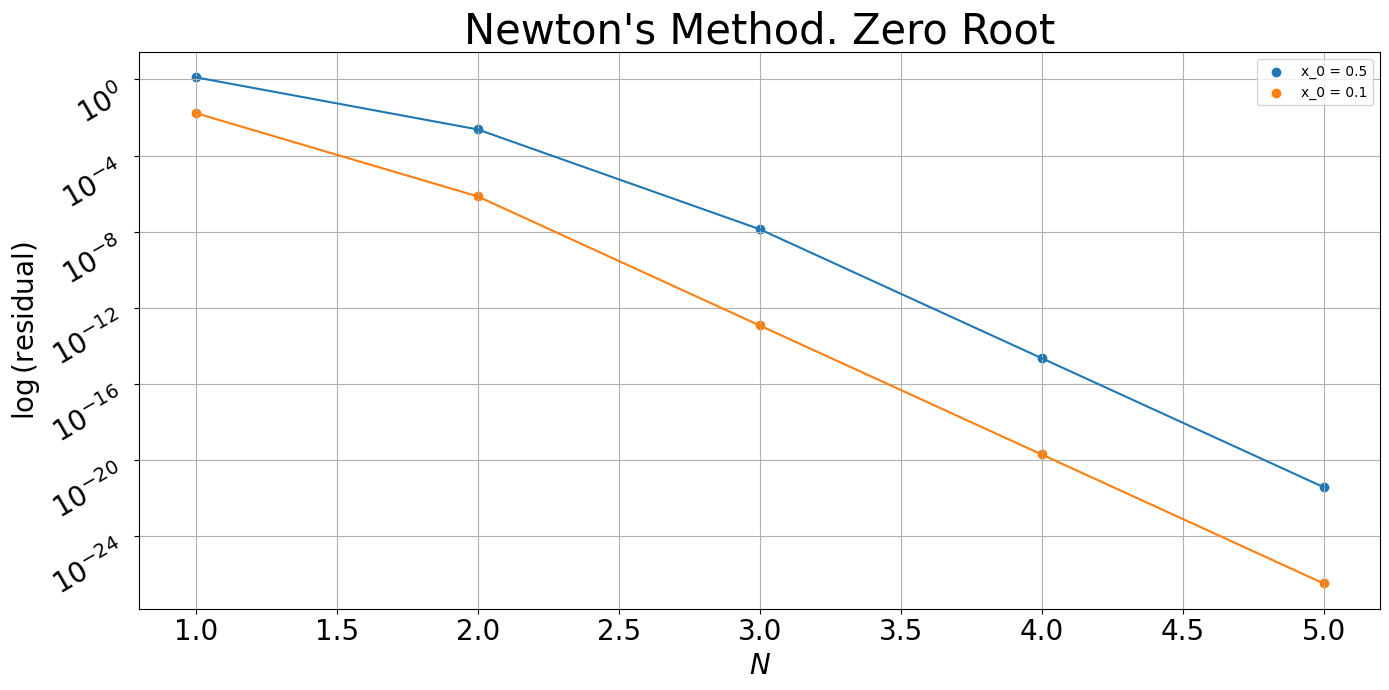

In [11]:
residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Zero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(0.5)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.5")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.5 => root: {root}")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(0.1)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.1")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.1 => root: {root}")

## Решение нелинейной системы ##


### Метод половинного деления для системы 12.4 б) ###

Рассмотрим систему

\begin{cases}
\tan(xy + 0.4) = x^2, \\
0.6x^2 + 2y^2 = 1.
\end{cases}


Из второго уравнения выразим \(y\) через \(x\):
\begin{cases}
y^2 = \dfrac{1 - 0.6x^2}{2}, \qquad
y = \pm \sqrt{\dfrac{1 - 0.6x^2}{2}},
\end{cases}
причём подкоренное выражение задаёт ограничение
\begin{cases}
|x| \le \sqrt{\dfrac{1}{0.6}} \approx 1.29.\
\end{cases}

Подставляя это выражение в первое уравнение, получаем два скалярных уравнения относительно одной переменной x:
\begin{cases}
F_{+}(x) = \tan\!\left(x\sqrt{\dfrac{1 - 0.6x^2}{2}} + 0.4\right) - x^2 = 0, \\
F_{-}(x) = \tan\!\left(-x\sqrt{\dfrac{1 - 0.6x^2}{2}} + 0.4\right) - x^2 = 0
\end{cases}


Метод половинного деления будем применять отдельно к $F_{+}(x)$ и $F_{-}(x)$ на соответствующих отрезках. После нахождения приближённого значения x соответствующее y вычисляем по формуле
\begin{cases}
y = \pm \sqrt{\dfrac{1 - 0.6x^2}{2}}.
\end{cases}

Из-за симметрии системы по замене $((x, y) \mapsto (-x, -y)$ остальные два корня получаются сменой знака у найденных решений.


Quadrant I root: x ≈ 1.0484001636505127, y ≈ 0.4126222595271291
Quadrant IV root: x ≈ 0.3798484325408935, y ≈ -0.6758065925165778
Quadrant II root: x ≈ -0.3798484325408935, y ≈ 0.6758065925165778
Quadrant III root: x ≈ -1.0484001636505127, y ≈ -0.4126222595271291


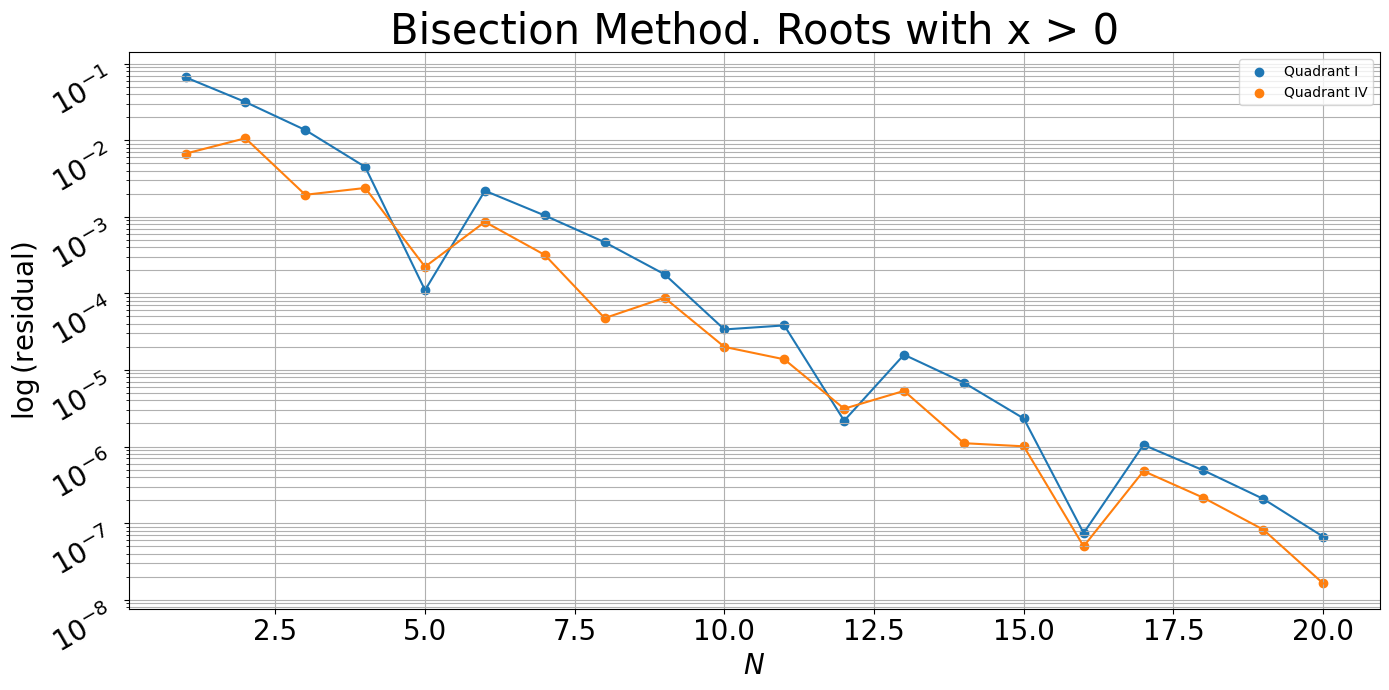

In [26]:

def y_pos_from_x(x):
    return np.sqrt((1 - 0.6 * x**2) / 2)

def y_neg_from_x(x):
    return -np.sqrt((1 - 0.6 * x**2) / 2)

def F_pos_sys1(x):
    y = y_pos_from_x(x)
    return np.tan(x * y + 0.4) - x**2

def F_neg_sys1(x):
    y = y_neg_from_x(x)
    return np.tan(x * y + 0.4) - x**2

# Ненулевые корни с x > 0: ветви с y > 0 и y < 0
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Bisection Method. Roots with x > 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

# Корень в I квадранте (y > 0)
for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(F_pos_sys1, i)
    root_x = bisection(1.0, 1.1)
    root_y = y_pos_from_x(root_x)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) +
                     np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="Quadrant I")
plt.plot(iterations, residuals)

print(f"Quadrant I root: x ≈ {root_x}, y ≈ {root_y}")

residuals_2 = []
for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(F_neg_sys1, i)
    root_x2 = bisection(0.3, 0.4)
    root_y2 = y_neg_from_x(root_x2)
    residuals_2.append(np.abs(np.tan(root_x2 * root_y2 + 0.4) - root_x2**2) +
                       np.abs(0.6 * root_x2**2 + 2 * root_y2**2 - 1))

plt.scatter(iterations, residuals_2, label="Quadrant IV")
plt.plot(iterations, residuals_2)

plt.legend(loc="best")
plt.tight_layout()

print(f"Quadrant IV root: x ≈ {root_x2}, y ≈ {root_y2}")

print(f"Quadrant II root: x ≈ {-root_x2}, y ≈ {-root_y2}")
print(f"Quadrant III root: x ≈ {-root_x}, y ≈ {-root_y}")




### Метод простой итерации ###

$\begin{align}
    \begin{cases}
        x_{n+1} = \pm\sqrt{\frac{1-2y_{n}^2}{0.6}} \\
        y_{n+1} = \frac{1}{x_n}(\arctan({x_n^2}) - 0.4) \\
    \end{cases}
\end{align}$

- $|\frac{\partial \varphi_1}{\partial x}| \equiv 0$
- $|\frac{\partial \varphi_1}{\partial y}| = \frac{10|y_n|}{3}\sqrt{\frac{0.6}{1-2y_{n}^2}}$
- $|\frac{\partial \varphi_2}{\partial x}| = \left|\frac{2}{1+x_n^4} - \frac{1}{x_n^2}(\arctan((x^2_n) - 0.4))\right|$
- $|\frac{\partial \varphi_2}{\partial y}| \equiv 0$

Данная система имеет 4 попарно симметричных корня, поэтому проверим условия только для одного корня каждой пары.

- $x \in [-0.4, -0.35]$, $y \in [0.65, 0.7]$
- $x \in [1.0, 1.5]$, $y \in [0.4, 0.45]$

Подставив точки из диапазонов, увидим, что $\max{\left(|\frac{\partial \varphi_1}{\partial y}|, |\frac{\partial \varphi_2}{\partial x}|\right)} > 1$ для обоих диапазонов. Это значит, что МПИ не сойдётся гарантированно к какому-либо корню. Однако попробуем воспользоваться им для решения системы.

In [12]:
def f_x_1(y):
    return np.sqrt((1 - 2 * y**2) / 0.6)

def f_x_2(y):
    return -np.sqrt((1 - 2 * y**2) / 0.6)

def f_y(x):
    return (np.arctan(x**2) - 0.4) / x

class Fixed_Point_Iteration_System:
    def __init__(self, f_x, f_y, n):
        self.f_x = f_x
        self.f_y = f_y
        self.n = n

    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        for i in range(self.n):
            x = self.f_x(y)
            y = self.f_y(x)

        return x, y

x_0 = 1, y_0 = 0.4 => root_x: 1.048391758359379, root_y: 0.41261798319847065
x_0 = 0.4, y_0 = -0.65 => root_x: 1.0484873869352371, root_y: 0.4126669543660528


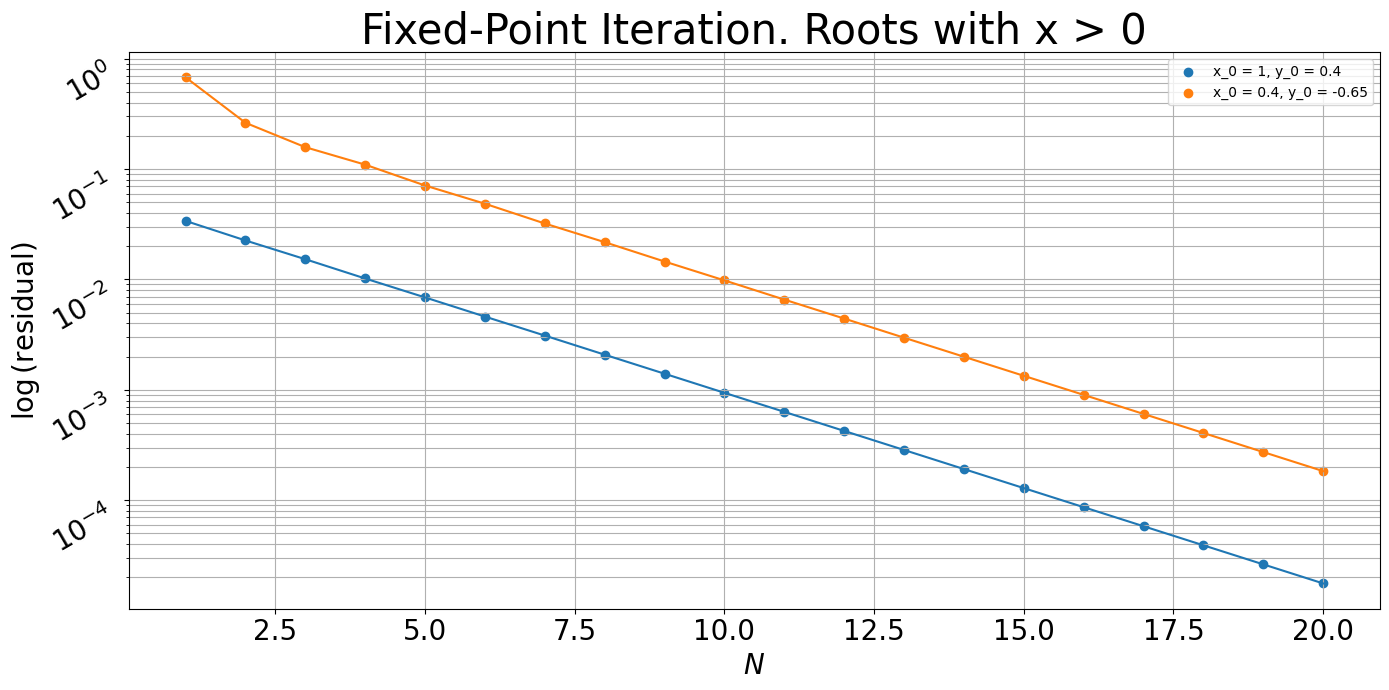

In [13]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Roots with x > 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_1, f_y, i)
    root_x, root_y = fpis(1, 0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 1, y_0 = 0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 1, y_0 = 0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_1, f_y, i)
    root_x, root_y = fpis(0.4, -0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 0.4, y_0 = -0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.4, y_0 = -0.65 => root_x: {root_x}, root_y: {root_y}")

Как видно из результатов, МПИ находит корень, но только один, лежащий в 1 квадранте.

Посмотрим, как программа находит симметричные корни.

x_0 = -1, y_0 = -0.4 => root_x: -1.048391758359379, root_y: -0.41261798319847065
x_0 = -0.4, y_0 = 0.65 => root_x: -1.0484873869352371, root_y: -0.4126669543660528


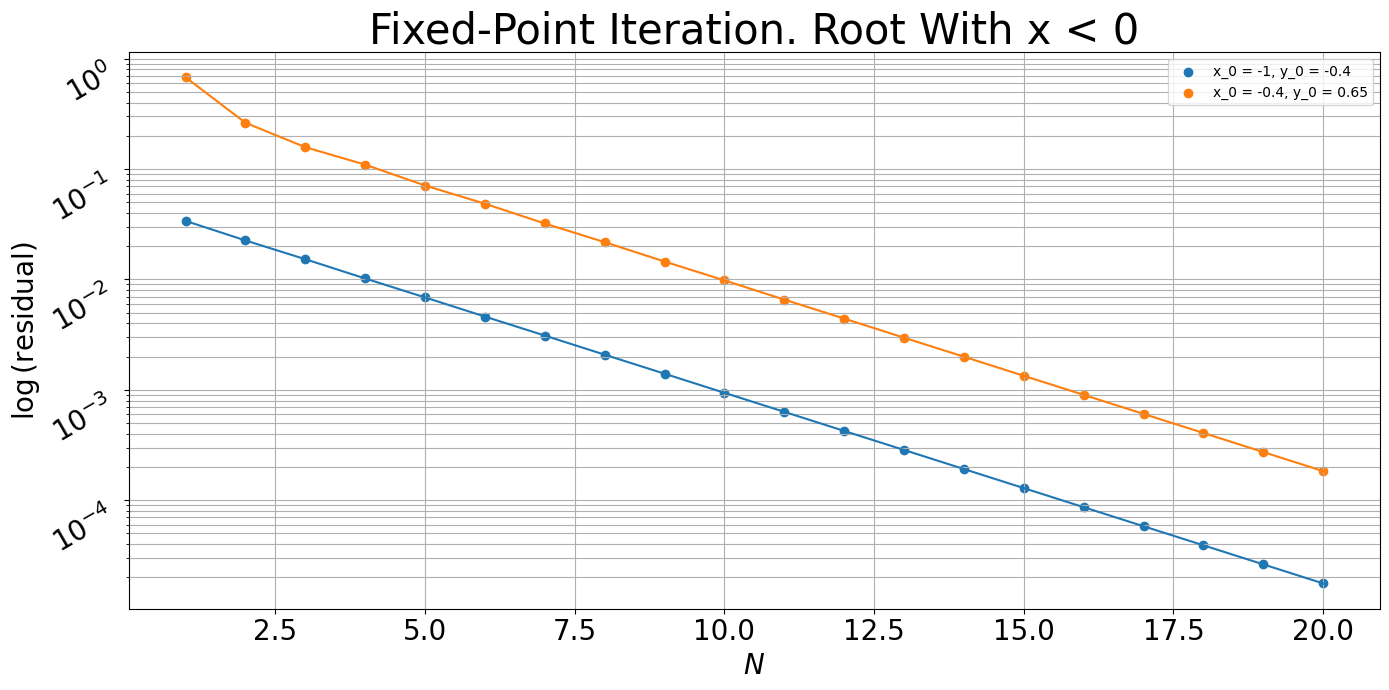

In [14]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Root With x < 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_2, f_y, i)
    root_x, root_y = fpis(-1, -0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -1, y_0 = -0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -1, y_0 = -0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_2, f_y, i)
    root_x, root_y = fpis(-0.4, 0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -0.4, y_0 = 0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -0.4, y_0 = 0.65 => root_x: {root_x}, root_y: {root_y}")

Как и ожидалось, был найден только корень, симметричный найденному ранее, то есть лежащий в 3 квадранте.

### Метод Ньютона

$\bar x_{n+1} = \bar x_n - J^{-1} \cdot \bar f(x_n)$

Здесь:

$J = \begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_2}{\partial x} \\
\frac{\partial f_1}{\partial y} & \frac{\partial f_2}{\partial y}
\end{pmatrix}$

In [15]:
def f_xy_1(x, y):
    return np.tan(x*y + 0.4) - x**2

def f_xy_2(x, y):
    return 0.6 * x**2 + 2 * y**2 - 1

def num_deriv_x(f, x, y, h):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def num_deriv_y(f, x, y, h):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

class Newton_System:
    def __init__(self, f_x, f_y, n):
        self.f_xy_1 = f_xy_1
        self.f_xy_2 = f_xy_2
        self.n = n

    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        J = np.zeros((2, 2))
        J[0, 0] = num_deriv_x(self.f_xy_1, x, y, 1e-6)
        J[0, 1] = num_deriv_y(self.f_xy_1, x, y, 1e-6)
        J[1, 0] = num_deriv_x(self.f_xy_2, x, y, 1e-6)
        J[1, 1] = num_deriv_y(self.f_xy_2, x, y, 1e-6)
        J = np.linalg.inv(J)
        for i in range(self.n):
            step = (J @ np.array([self.f_xy_1(x, y), self.f_xy_2(x, y)])).tolist()
            x -= step[0]
            y -= step[1]

        return x, y

x_0 = 1, y_0 = 0.4 => root_x: 1.0484001411026231, root_y: 0.4126222767141881
x_0 = 0.4, y_0 = -0.65 => root_x: 0.37984844431748094, root_y: -0.6758065905308093


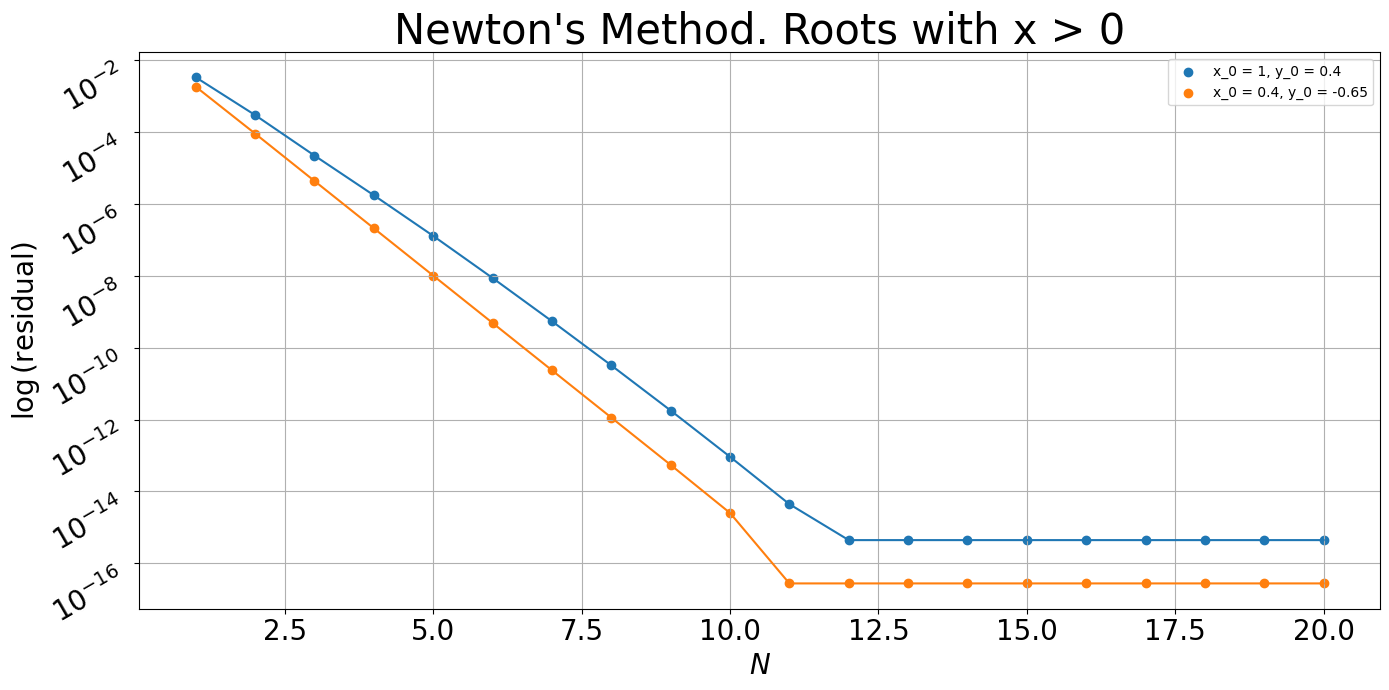

In [16]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Roots with x > 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(1, 0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 1, y_0 = 0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 1, y_0 = 0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(0.4, -0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 0.4, y_0 = -0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.4, y_0 = -0.65 => root_x: {root_x}, root_y: {root_y}")

Видно, что метод Ньютона работает для обоих корней с $x > 0$. Проверим также, как он справляется с нахождением симметричной пары.

x_0 = -1, y_0 = -0.4 => root_x: -1.0484001411026231, root_y: -0.4126222767141881
x_0 = -0.4, y_0 = 0.65 => root_x: -0.37984844431748094, root_y: 0.6758065905308093


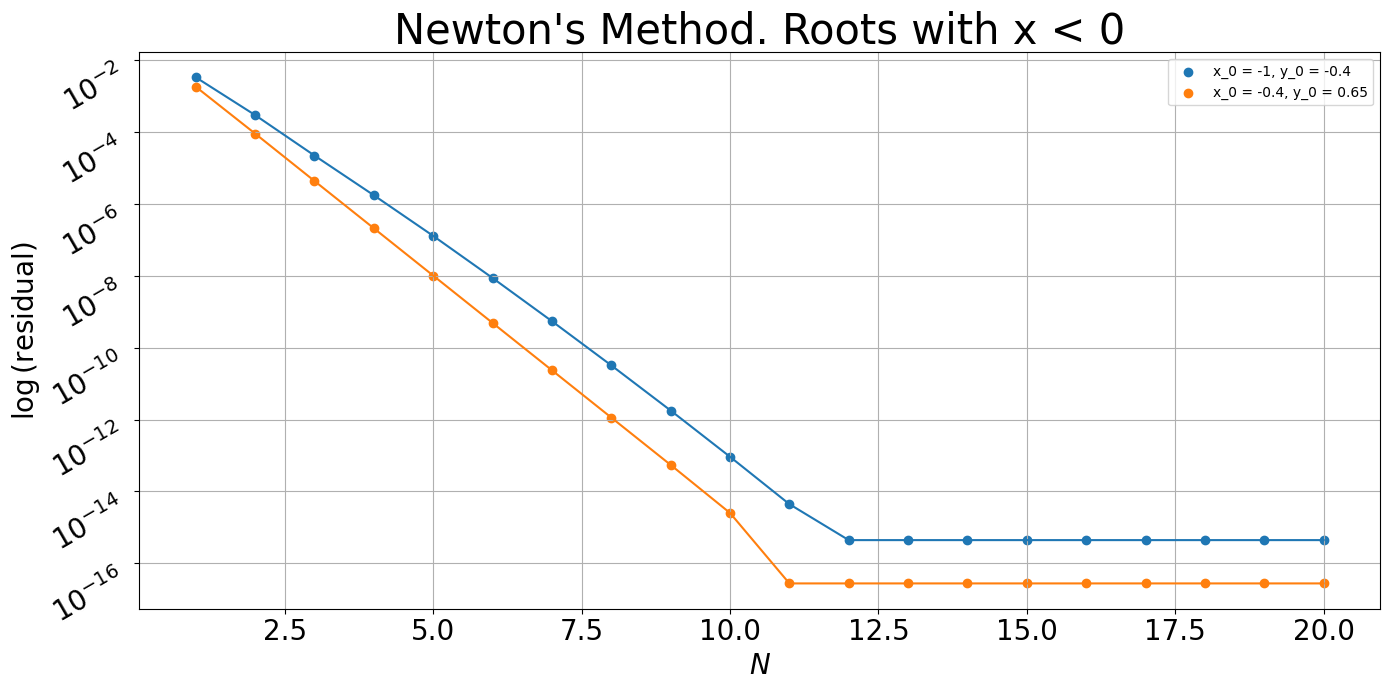

In [17]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Roots with x < 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(-1, -0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -1, y_0 = -0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -1, y_0 = -0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(-0.4, 0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -0.4, y_0 = 0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -0.4, y_0 = 0.65 => root_x: {root_x}, root_y: {root_y}")

Как и ожидалось, с помощью метода Ньютона были найдены все корни.


## Решение нелинейного уравнения  $(\ln x + (x - 1)^3 = 0$) ##



### Метод половинного деления ###

Рассматриваем уравнение
\begin{cases}
f(x) = \ln x + (x - 1)^3 = 0, \qquad x > 0.
\end{cases}

Поскольку
\begin{cases}
f'(x) = \frac{1}{x} + 3(x - 1)^2 > 0 \quad \text{при } x > 0,
\end{cases}
функция $(f(x)$) строго возрастает на своей области определения, и уравнение имеет единственный корень.

Легко проверить, что
\begin{cases}
f(0.1) < 0,\qquad f(2) > 0,
\end{cases}
значит, по теореме Больцано на отрезке \([0.1,\,2]\) существует единственный корень — это и есть наш корень \(x = 1\).

Метод половинного деления будем применять к функции \(f(x)\) на отрезке \([0.1,\,2]\).


[0.1, 2] => root (after 20 iterations): 0.9999992847442629


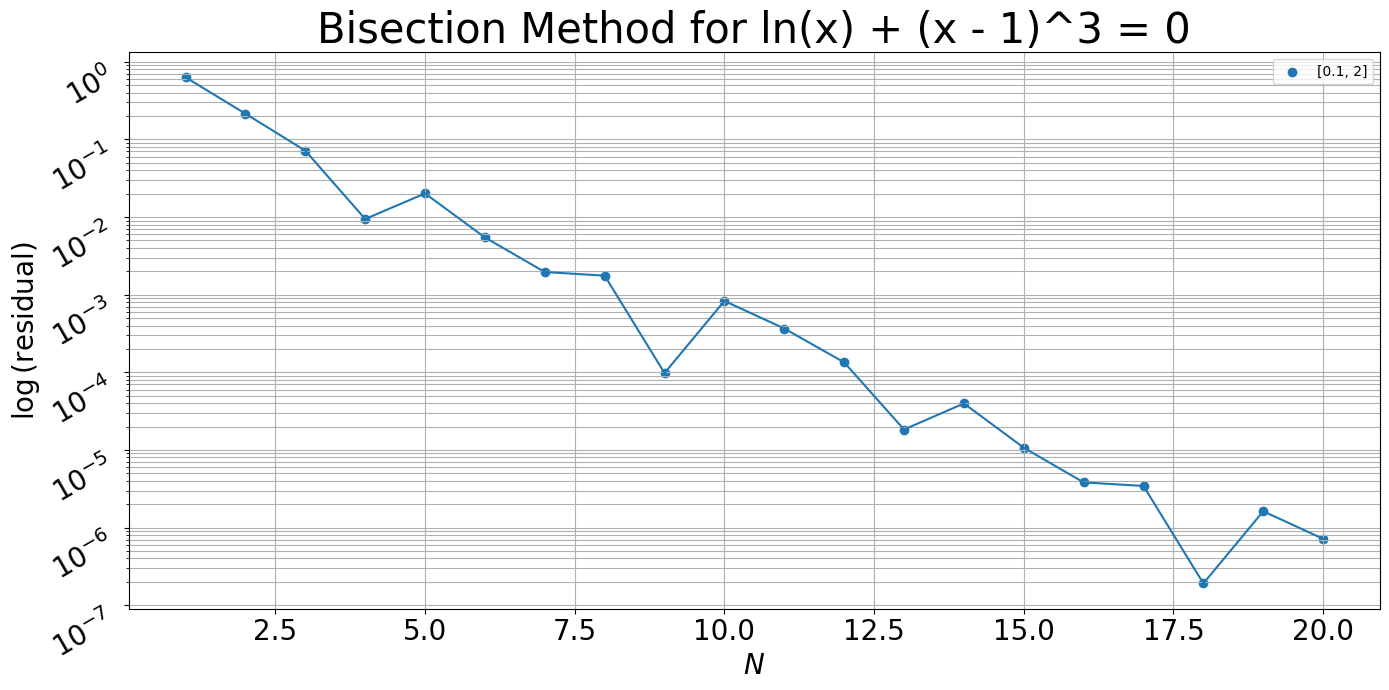

In [27]:

def f_k(x):
    return np.log(x) + (x - 1)**3

residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Bisection Method for ln(x) + (x - 1)^3 = 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(f_k, i)
    root = bisection(0.1, 2.0)
    residuals.append(np.abs(f_k(root)))

plt.scatter(iterations, residuals, label="[0.1, 2]")
plt.plot(iterations, residuals)
plt.legend(loc="best")
plt.tight_layout()

print(f"[0.1, 2] => root (after {iterations.size} iterations): {root}")



### Метод простой итерации ###

Преобразуем исходное уравнение:
\begin{cases}
\ln x + (x - 1)^3 = 0
\;\Rightarrow\;
\ln x = -(x - 1)^3
\;\Rightarrow\;
x = e^{-(x - 1)^3}.
\end{cases}

Получаем итерационный процесс
\begin{cases}
x_{n+1} = \varphi(x_n) = e^{-(x_n - 1)^3}.
\end{cases}

Производная итерационной функции:
\begin{cases}
\varphi'(x) = -3(x - 1)^2 e^{-(x - 1)^3},
\end{cases}
и в окрестности корня $(x = 1$) имеем $(|\varphi'(x)| \ll 1$), что обеспечивает сходимость метода простой итерации при начальных приближениях, близких к единице.


x_0 = 0.5 => root: 1.0
x_0 = 1.5 => root: 1.0


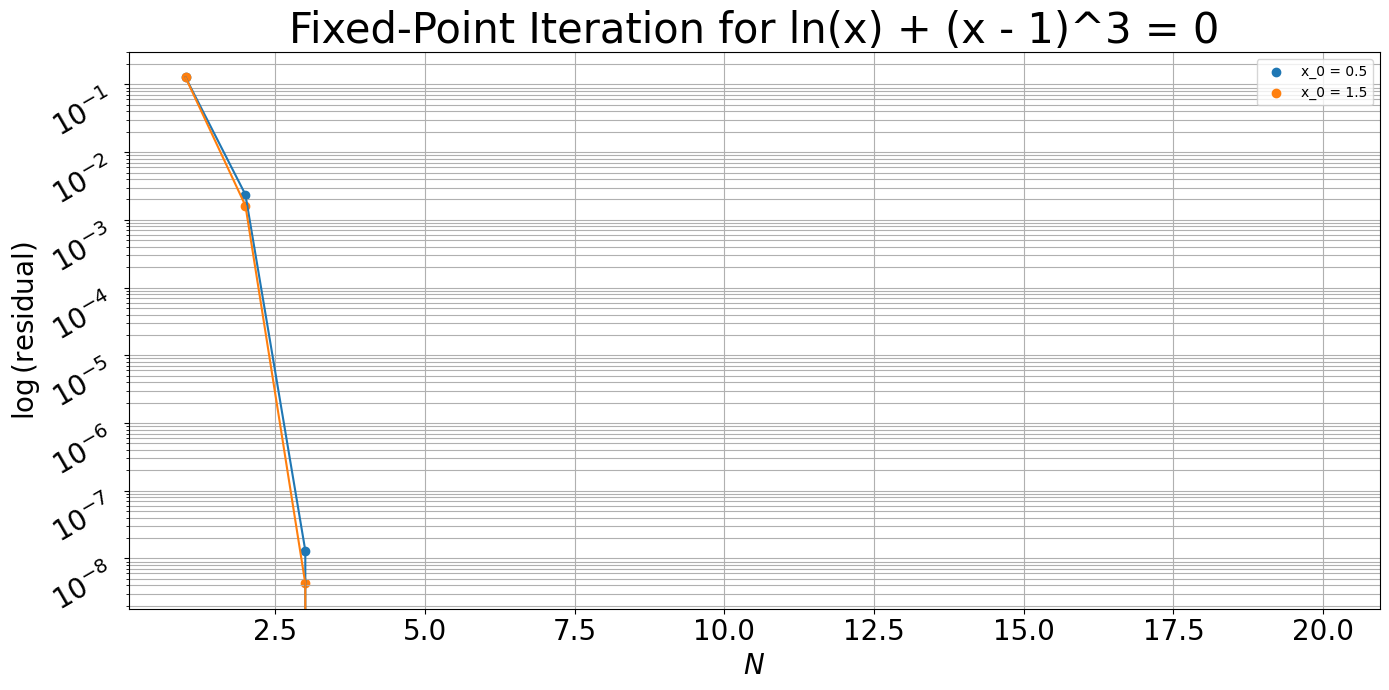

In [20]:

def phi_k(x):
    return np.exp(-(x - 1)**3)

residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration for ln(x) + (x - 1)^3 = 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

for x0 in [0.5, 1.5]:
    residuals = []
    for i in range(1, iterations.size + 1):
        fpie = Fixed_Point_Iteration_Equation(phi_k, i)
        root = fpie(x0)
        residuals.append(np.abs(f_k(root)))
    plt.scatter(iterations, residuals, label=f"x_0 = {x0}")
    plt.plot(iterations, residuals)

plt.legend(loc="best")
plt.tight_layout()

print(f"x_0 = 0.5 => root: {Fixed_Point_Iteration_Equation(phi_k, 20)(0.5)}")
print(f"x_0 = 1.5 => root: {Fixed_Point_Iteration_Equation(phi_k, 20)(1.5)}")



### Метод Ньютона ###

Для функции
\begin{cases}
f(x) = \ln x + (x - 1)^3
\end{cases}
итерационный процесс Ньютона задаётся формулой
\begin{cases}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},
\end{cases}
где
\begin{cases}
f'(x) = \frac{1}{x} + 3(x - 1)^2.
\end{cases}

В нашем коде производная аппроксимируется численно, как и для первого уравнения, с помощью центральной разности.


x_0 = 0.5 => root: 1.0
x_0 = 1.5 => root: 1.0


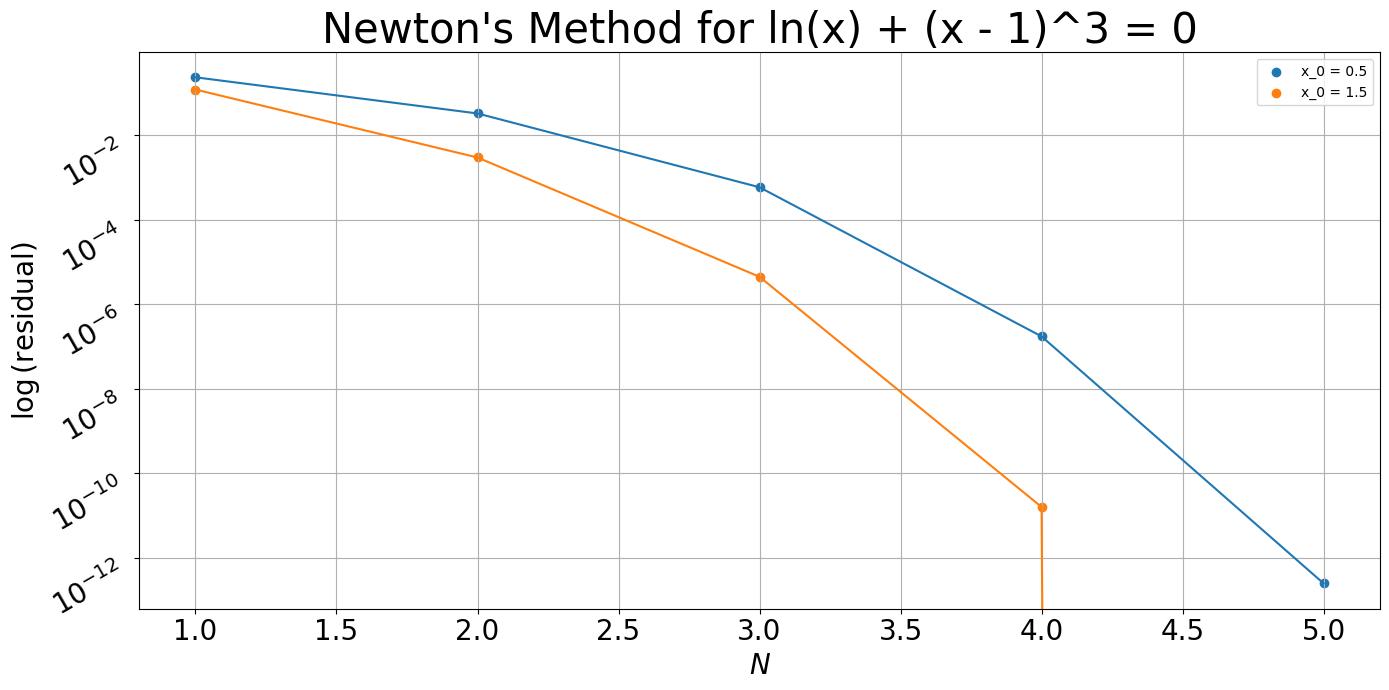

In [21]:

def g_k(x):
    return np.log(x) + (x - 1)**3

residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method for ln(x) + (x - 1)^3 = 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

for x0 in [0.5, 1.5]:
    residuals = []
    for i in range(1, iterations.size + 1):
        newton = Newton_Equation(g_k, i)
        root = newton(x0)
        residuals.append(np.abs(g_k(root)))
    plt.scatter(iterations, residuals, label=f"x_0 = {x0}")
    plt.plot(iterations, residuals)

plt.legend(loc="best")
plt.tight_layout()

print(f"x_0 = 0.5 => root: {Newton_Equation(g_k, 20)(0.5)}")
print(f"x_0 = 1.5 => root: {Newton_Equation(g_k, 20)(1.5)}")



## Решение системы \(12.6\,б)\) ##

\begin{cases}
(x - 1.4)^2 - (y - 0.6)^2 = 1, \\
4.2x^2 + 8.8y^2 = 1.42.
\end{cases}




### Метод половинного деления ###

Из второго уравнения выразим y через x:
\begin{cases}
4.2x^2 + 8.8y^2 = 1.42
\;\Rightarrow\;
y^2 = \frac{1.42 - 4.2x^2}{8.8},
\qquad
y = \pm \sqrt{\frac{1.42 - 4.2x^2}{8.8}}.
\end{cases}

Подставим это в первое уравнение:
\begin{cases}
(x - 1.4)^2 - (y - 0.6)^2 = 1.
\end{cases}

Получаем два скалярных уравнения относительно \(x\):
\begin{cases}
F_{+}(x) = (x - 1.4)^2 - \left(\sqrt{\frac{1.42 - 4.2x^2}{8.8}} - 0.6\right)^2 - 1 = 0,
\end{cases}
\begin{cases}
F_{-}(x) = (x - 1.4)^2 - \left(-\sqrt{\frac{1.42 - 4.2x^2}{8.8}} - 0.6\right)^2 - 1 = 0,
\end{cases}
где знак перед корнем соответствует выбору знака для \(y\).

Численный анализ показывает, что
\begin{cases}
F_{+}(0.35) > 0,\quad F_{+}(0.4) < 0,
\end{cases}
поэтому на отрезке [0.35,0.4] есть корень, соответствующий решению с \(y > 0\).  
Аналогично,
\begin{cases}
F_{-}(-0.1) > 0,\quad F_{-}(0) < 0,
\end{cases}
поэтому на отрезке [-0.1,0] есть корень, соответствующий решению с \(y < 0\).

Для каждого найденного значения x соответствующее y вычисляем по одной из формул
\begin{cases}
y = \pm \sqrt{\frac{1.42 - 4.2x^2}{8.8}}.
\end{cases}


y > 0 root: x ≈ 0.3602642774581908, y ≈ 0.3153065845021492
y < 0 root: x ≈ -0.015318155288696289, y ≈ -0.40156150996311146


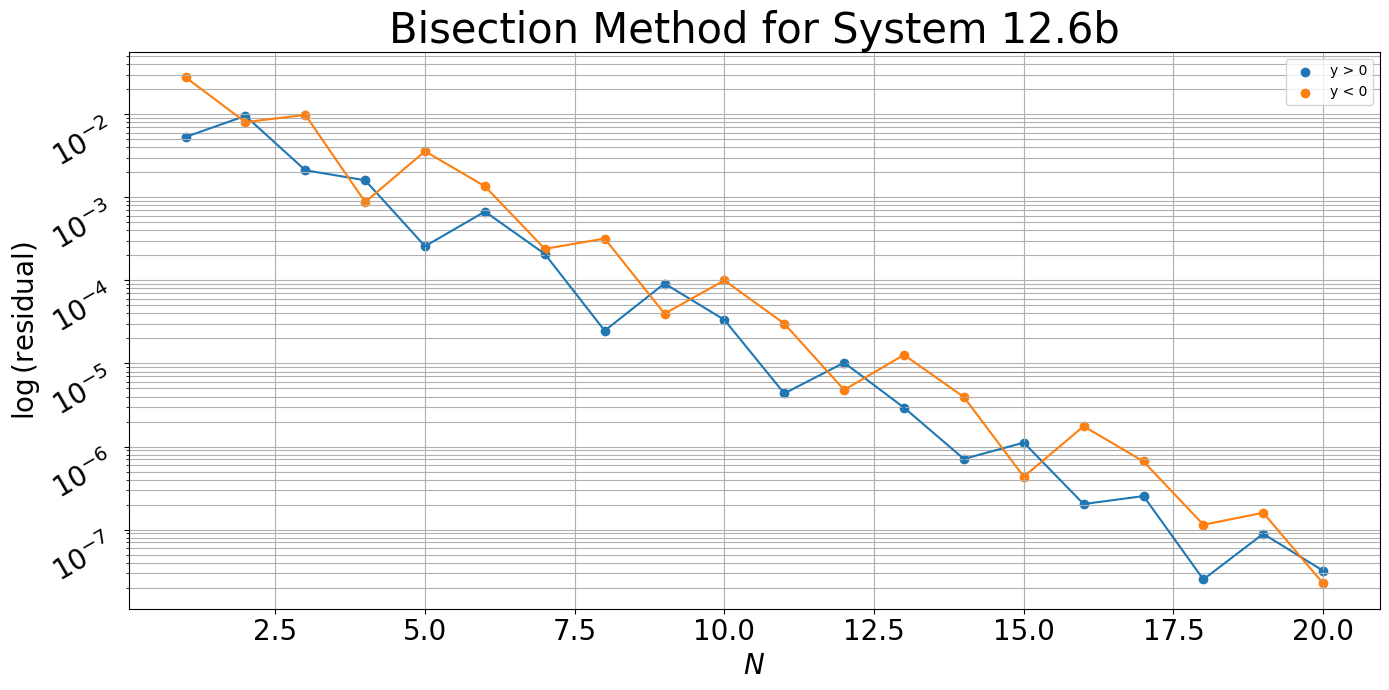

In [22]:

def y2_pos_from_x(x):
    return np.sqrt((1.42 - 4.2 * x**2) / 8.8)

def y2_neg_from_x(x):
    return -np.sqrt((1.42 - 4.2 * x**2) / 8.8)

def F2_pos(x):
    y = y2_pos_from_x(x)
    return (x - 1.4)**2 - (y - 0.6)**2 - 1

def F2_neg(x):
    y = y2_neg_from_x(x)
    return (x - 1.4)**2 - (y - 0.6)**2 - 1

residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Bisection Method for System 12.6b", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

# Корень с y > 0
residuals_pos = []
for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(F2_pos, i)
    root_x = bisection(0.35, 0.4)
    root_y = y2_pos_from_x(root_x)
    residuals_pos.append(np.abs((root_x - 1.4)**2 - (root_y - 0.6)**2 - 1) +
                         np.abs(4.2 * root_x**2 + 8.8 * root_y**2 - 1.42))

plt.scatter(iterations, residuals_pos, label="y > 0")
plt.plot(iterations, residuals_pos)

print(f"y > 0 root: x ≈ {root_x}, y ≈ {root_y}")

# Корень с y < 0
residuals_neg = []
for i in range(1, iterations.size + 1):
    bisection = Bisection_Method_Equation(F2_neg, i)
    root_x2 = bisection(-0.1, 0.0)
    root_y2 = y2_neg_from_x(root_x2)
    residuals_neg.append(np.abs((root_x2 - 1.4)**2 - (root_y2 - 0.6)**2 - 1) +
                         np.abs(4.2 * root_x2**2 + 8.8 * root_y2**2 - 1.42))

plt.scatter(iterations, residuals_neg, label="y < 0")
plt.plot(iterations, residuals_neg)

plt.legend(loc="best")
plt.tight_layout()

print(f"y < 0 root: x ≈ {root_x2}, y ≈ {root_y2}")



### Метод простой итерации ###

Преобразуем систему к виду

\begin{cases}
x = \varphi_1(y), \\
y = \varphi_2(x).
\end{cases}


Из первого уравнения:
\begin{cases}
(x - 1.4)^2 = 1 + (y - 0.6)^2
\;\Rightarrow\;
x = 1.4 \pm \sqrt{1 + (y - 0.6)^2}.
\end{cases}
Так как оба корня, найденные численно, имеют \(x < 1.4\), выбираем ветвь
\begin{cases}
\varphi_1(y) = 1.4 - \sqrt{1 + (y - 0.6)^2}.
\end{cases}

Из второго уравнения:
\begin{cases}
4.2x^2 + 8.8y^2 = 1.42
\;\Rightarrow\;
y^2 = \frac{1.42 - 4.2x^2}{8.8}
\;\Rightarrow\;
y = \pm \sqrt{\frac{1.42 - 4.2x^2}{8.8}}.
\end{cases}

Для корня с \(y > 0\) используем
\begin{cases}
\varphi_2(x) = +\sqrt{\frac{1.42 - 4.2x^2}{8.8}},
\end{cases}
а для корня с \(y < 0\)
\begin{cases}
\varphi_2(x) = -\sqrt{\frac{1.42 - 4.2x^2}{8.8}}.
\end{cases}

Итерационный процесс имеет вид

\begin{cases}
x_{n+1} = \varphi_1(y_n), \\
y_{n+1} = \varphi_2(x_n).
\end{cases}



Fixed-point root (y > 0): x ≈ 0.36026429080634204, y ≈ 0.3153065772230789
Fixed-point root (y < 0): x ≈ -0.015318147458426745, y ≈ -0.4015615101056714


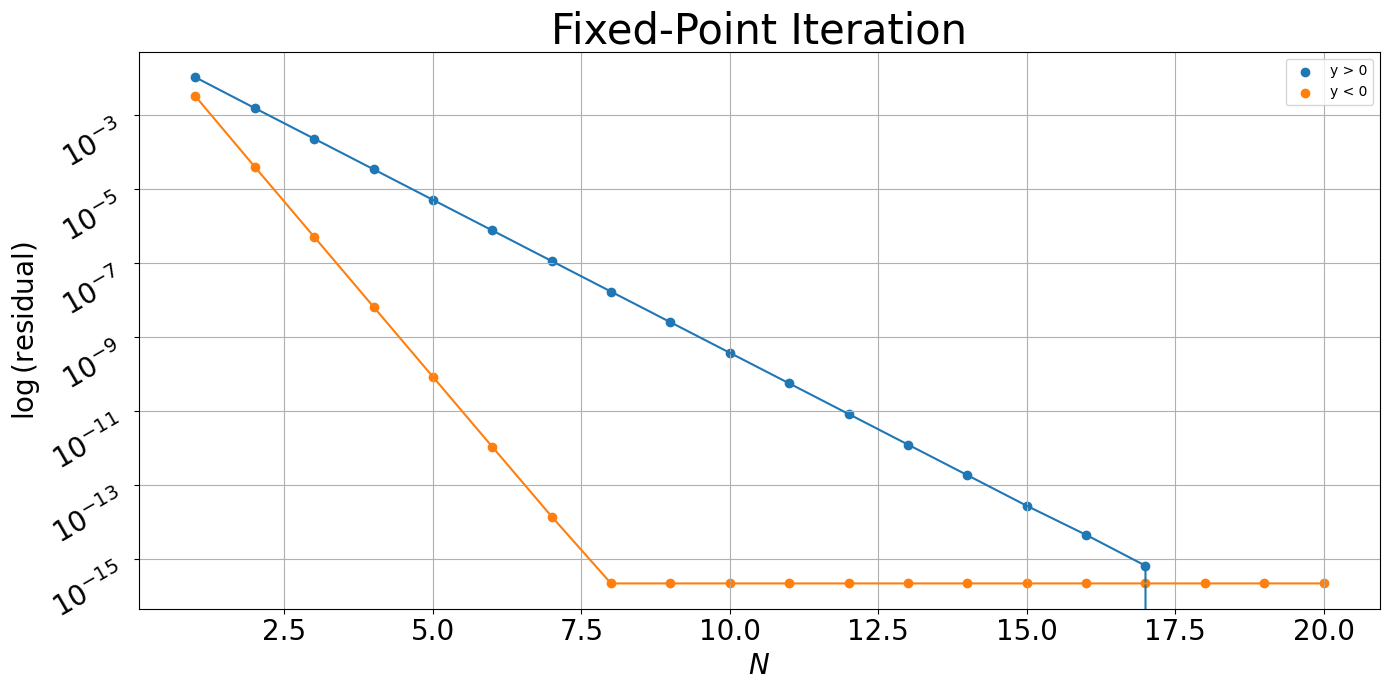

In [28]:

def f2_x(y):
    return 1.4 - np.sqrt(1 + (y - 0.6)**2)

def f2_y_pos(x):
    return np.sqrt((1.42 - 4.2 * x**2) / 8.8)

def f2_y_neg(x):
    return -np.sqrt((1.42 - 4.2 * x**2) / 8.8)

residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

# Корень с y > 0
residuals_pos = []
for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f2_x, f2_y_pos, i)
    root_x, root_y = fpis(0.3, 0.3)
    residuals_pos.append(np.abs((root_x - 1.4)**2 - (root_y - 0.6)**2 - 1) +
                         np.abs(4.2 * root_x**2 + 8.8 * root_y**2 - 1.42))

plt.scatter(iterations, residuals_pos, label="y > 0")
plt.plot(iterations, residuals_pos)

print(f"Fixed-point root (y > 0): x ≈ {root_x}, y ≈ {root_y}")

# Корень с y < 0
residuals_neg = []
for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f2_x, f2_y_neg, i)
    root_x2, root_y2 = fpis(-0.05, -0.4)
    residuals_neg.append(np.abs((root_x2 - 1.4)**2 - (root_y2 - 0.6)**2 - 1) +
                         np.abs(4.2 * root_x2**2 + 8.8 * root_y2**2 - 1.42))

plt.scatter(iterations, residuals_neg, label="y < 0")
plt.plot(iterations, residuals_neg)

plt.legend(loc="best")
plt.tight_layout()

print(f"Fixed-point root (y < 0): x ≈ {root_x2}, y ≈ {root_y2}")



### Метод Ньютона ###

Запишем систему в векторном виде

\begin{cases}
f_1(x, y) = (x - 1.4)^2 - (y - 0.6)^2 - 1 = 0, \\
f_2(x, y) = 4.2x^2 + 8.8y^2 - 1.42 = 0.
\end{cases}


Метод Ньютона для системы задаётся формулой
\begin{cases}
\bar x_{n+1} = \bar x_n - J^{-1}(\bar x_n)\,\bar f(\bar x_n),
\end{cases}
где $\bar x_n = (x_n, y_n)^T$,


\begin{cases}
bar f(\bar x) =
\begin{pmatrix}
f_1(x, y) \\
f_2(x, y)
\end{pmatrix},
\qquad
J =
\begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{pmatrix}
\end{cases}
Как и ранее, частные производные аппроксимируются численно с помощью центральных разностей.


Newton root (y > 0): x ≈ 0.360264290806342, y ≈ 0.3153065772230789
Newton root (y < 0): x ≈ -0.01531814745842691, y ≈ -0.4015615101056714


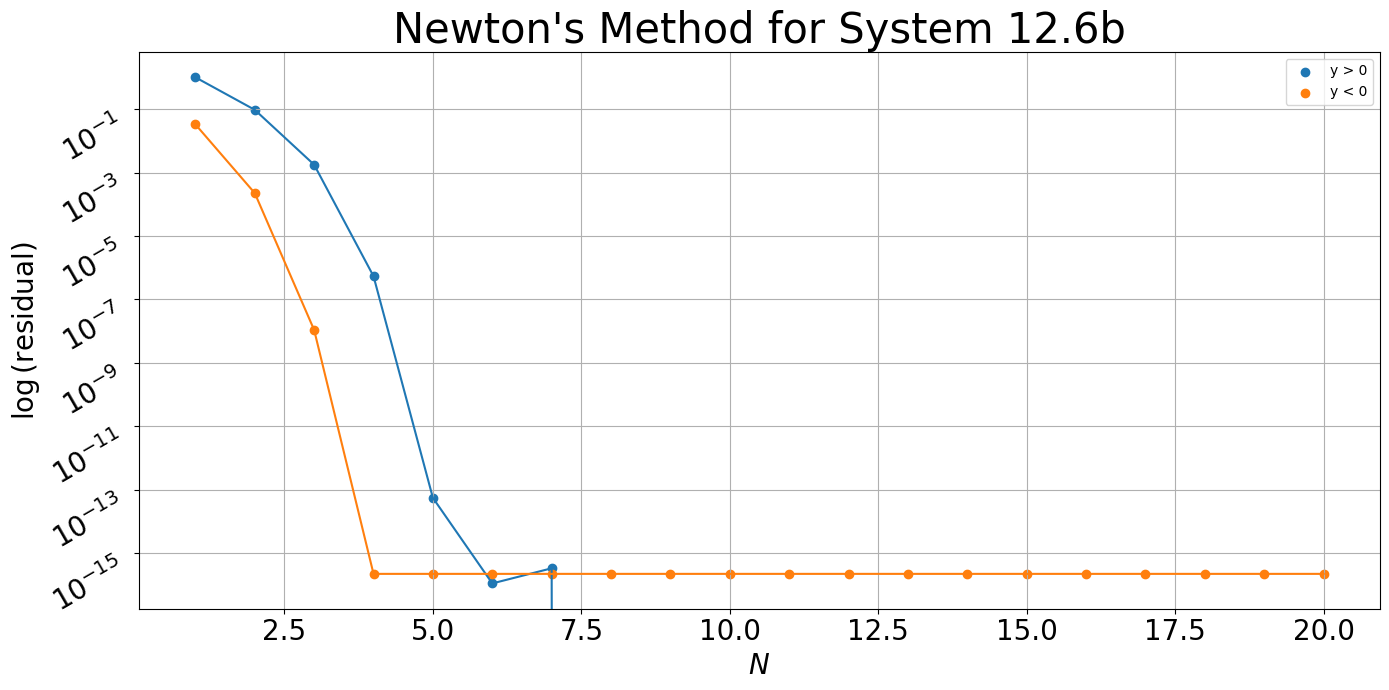

In [24]:

def f2_1(x, y):
    return (x - 1.4)**2 - (y - 0.6)**2 - 1

def f2_2(x, y):
    return 4.2 * x**2 + 8.8 * y**2 - 1.42

def num_dx2(f, x, y, h):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def num_dy2(f, x, y, h):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

class Newton_System_2:
    def __init__(self, f1, f2, n):
        self.f1 = f1
        self.f2 = f2
        self.n = n

    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        for i in range(self.n):
            J = np.zeros((2, 2))
            J[0, 0] = num_dx2(self.f1, x, y, 1e-6)
            J[0, 1] = num_dy2(self.f1, x, y, 1e-6)
            J[1, 0] = num_dx2(self.f2, x, y, 1e-6)
            J[1, 1] = num_dy2(self.f2, x, y, 1e-6)
            F = np.array([self.f1(x, y), self.f2(x, y)])
            step = np.linalg.solve(J, F)
            x -= step[0]
            y -= step[1]
        return x, y

residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize=20)
plt.xticks(fontsize=20, ha="center", va="top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize=20)
plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

plt.grid(which="both")

# Корень с y > 0
residuals_pos = []
for i in range(1, iterations.size + 1):
    newton_sys = Newton_System_2(f2_1, f2_2, i)
    root_x, root_y = newton_sys(0.5, 0.1)
    residuals_pos.append(np.abs(f2_1(root_x, root_y)) + np.abs(f2_2(root_x, root_y)))

plt.scatter(iterations, residuals_pos, label="y > 0")
plt.plot(iterations, residuals_pos)

print(f"Newton root (y > 0): x ≈ {root_x}, y ≈ {root_y}")

# Корень с y < 0
residuals_neg = []
for i in range(1, iterations.size + 1):
    newton_sys = Newton_System_2(f2_1, f2_2, i)
    root_x2, root_y2 = newton_sys(-0.1, -0.4)
    residuals_neg.append(np.abs(f2_1(root_x2, root_y2)) + np.abs(f2_2(root_x2, root_y2)))

plt.scatter(iterations, residuals_neg, label="y < 0")
plt.plot(iterations, residuals_neg)

plt.legend(loc="best")
plt.tight_layout()

print(f"Newton root (y < 0): x ≈ {root_x2}, y ≈ {root_y2}")
